<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/unit_4_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (1025, 14)
Decision Tree Performance:
accuracy: 0.9707792207792207
precision: 1.0
recall score: 0.9395973154362416
f1 score: 0.9688581314878892

Random Forest Performance for estimator  1  is:
Accuracy:  0.9285714285714286
Precision:  0.950354609929078
Recall:  0.8993288590604027
F1-Score:  0.9241379310344827

Random Forest Performance for estimator  5  is:
Accuracy:  0.9545454545454546
Precision:  0.9787234042553191
Recall:  0.9261744966442953
F1-Score:  0.9517241379310345

Random Forest Performance for estimator  10  is:
Accuracy:  0.9707792207792207
Precision:  1.0
Recall:  0.9395973154362416
F1-Score:  0.9688581314878892

Random Forest Performance for estimator  50  is:
Accuracy:  0.9805194805194806
Precision:  1.0
Recall:  0.959731543624161
F1-Score:  0.9794520547945206

Random Forest Performance for estimator  100  is:
Accuracy:  0.9805194805194806
Precision:  1.0
Recall:  0.959731543624161
F1-Score:  0.9794520547945206

Random Forest Performance for estimator  200

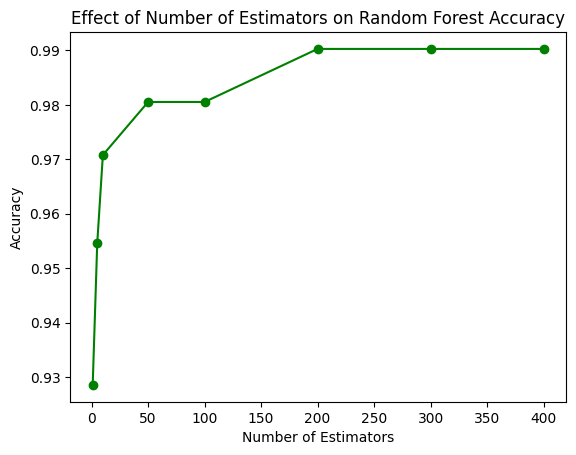


 Observations:

1.The Random Forest classifier consistently achieves higher accuracy and F1-score
    compared to a single Decision Tree.
2.This demonstrates the advantage of ensemble learning — it reduces variance and overfitting.
3. As the number of estimators increases (10 → 300), accuracy generally improves and stabilizes.
4. Beyond a certain point, increasing trees gives marginal benefit but increases computation time.
5. Thus, Random Forest provides more robust and generalized performance than a single Decision Tree.



In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/content/heart.csv")
print("Dataset Shape:", df.shape)

X = df.drop("target",axis=1)
y = df["target"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("accuracy:",acc_dt)
print("precision:",prec_dt)
print("recall score:",rec_dt)
print("f1 score:",f1_dt)





estimators = [1,5,10,50,100,200,300,400]
rf_results = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    prec_rf = precision_score(y_test, y_pred_rf)
    rec_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    rf_results.append(acc_rf)
    print("\nRandom Forest Performance for estimator ",n," is:")
    print("Accuracy: ",acc_rf)
    print("Precision: ", prec_rf)
    print("Recall: ",rec_rf)
    print("F1-Score: ",f1_rf)

plt.plot(estimators, rf_results, marker='o', color='green')
plt.title("Effect of Number of Estimators on Random Forest Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

print("\n Observations:")
print("""
1.The Random Forest classifier consistently achieves higher accuracy and F1-score
    compared to a single Decision Tree.
2.This demonstrates the advantage of ensemble learning — it reduces variance and overfitting.
3. As the number of estimators increases (10 → 300), accuracy generally improves and stabilizes.
4. Beyond a certain point, increasing trees gives marginal benefit but increases computation time.
5. Thus, Random Forest provides more robust and generalized performance than a single Decision Tree.
""")
